# Analysis of gaming platforms

##  Project description

Analysis for  an online store that sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. It is needed to be identify the patterns that determine the success of the game. This will allow  to bet on a potentially popular product and plan advertising campaigns.

Here is the data up to 2016. Let's imagine that it's December 2016, and you're planning a campaign for 2017. We need to work out the principle of working with data. It does not matter whether you forecast sales for 2017 according to 2016 data or 2027 according to 2026 data.

The data set contains the abbreviation ESRB (Entertainment Software Rating Board), an association that determines the age rating of computer games. ESRB evaluates game content and assigns it a suitable age category, for example, "For adults", "For younger children" or "For teenagers". 

**Data description:**

- *Name* — name of the game;
- *Platform* — platform;
- *Year_of_Release* — year of release;
- *Genre* — genre of the game;
- *NA_sales* — sales in North America (million dollars);
- *EU_sales* — sales in Europe Union (million dollars);
- *JP_sales* — sales in  Japan (million dollars);
- *Other_sales* — sales in other countries (million dollars);
- *Critic_Score* — critic score (max 100);
- *User_Score* — user score (max 10);
- *Rating* — ESRB rating(Entertainment Software Rating Board).


## Data overview

In [53]:
#libaries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats as st

pd.options.mode.chained_assignment = None  #  Pandas warnings off
pd.options.display.float_format = '{:,.2f}'.format 

In [54]:
# reading data files and saving to df
df = pd.read_csv('/datasets/games.csv')

In [55]:
# data overview
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [56]:
# null overview
df.isnull().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

In [57]:
# # checking for obvious duplicates
df.duplicated().sum()

0

**Conclusion**

- The table has 11 columns and 16715 rows.
- There are practically no gaps in the columns: Name, Platform, Year_of_Release, Genre, NA_samez, Eu_sales, JP_sales, Other_sales.
- There are issues with data types.
- There are no explicit duplicates, perhaps there are implicit ones
- There are gaps in data

## Data wrangling

In [58]:
#lowercase conversion
df.columns = df.columns.str.lower()

In [59]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [60]:
# size of the table
df.shape

(16715, 11)

In [61]:
# checking null values
df.isnull().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

In [62]:
# deleting name, genre and year of release emty values
df = df.dropna(subset=['name']) 
df = df.dropna(subset=['genre'])
df = df.dropna(subset=['year_of_release'])

In [63]:
# checking size of the table
df.shape

(16444, 11)

### Column name

In [64]:
# checking nummber of unique names
len(df['name'].unique())

11426

There are many unique values, we will bring everything to the lower case for further convenience of work and for search of implicit duplicates.

In [65]:
#lowercase conversion
df['name'] = df['name'].str.lower()

In [66]:
# checking nummber of unique names
len(df['name'].unique())

11426

### Column platform

In [67]:
# checking number of unique names
len(df['platform'].unique())

31

In [68]:
df['platform'].unique().tolist() # checking for duplicates

['Wii',
 'NES',
 'GB',
 'DS',
 'X360',
 'PS3',
 'PS2',
 'SNES',
 'GBA',
 'PS4',
 '3DS',
 'N64',
 'PS',
 'XB',
 'PC',
 '2600',
 'PSP',
 'XOne',
 'WiiU',
 'GC',
 'GEN',
 'DC',
 'PSV',
 'SAT',
 'SCD',
 'WS',
 'NG',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

### Column of year_of_release

In [69]:
#setting type int for the column
df['year_of_release']=np.ceil(df['year_of_release']).astype('int')

### Column genre

In [70]:
#lowercase conversion
df['genre'] = df['genre'].str.lower()

In [71]:
#checking number of unique names
len(df['genre'].unique())

12

In [72]:
#checking unique names
df['genre'].unique().tolist()

['sports',
 'platform',
 'racing',
 'role-playing',
 'puzzle',
 'misc',
 'shooter',
 'simulation',
 'action',
 'fighting',
 'adventure',
 'strategy']

### Column  user_score

In [73]:
# the column has a strange object format instead of float
df['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD-To Be Determined. It is written when the game has an insufficient number of reviews (less than 4) to calculate the user rating and publish it.

In [74]:
df['user_score'] =df['user_score'].replace('tbd', np.NaN) #changing TBD to NaN
df['user_score'] = df['user_score'].astype('float')       #setting type int for the column

In [75]:
df.info() # checking datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Column rating

In [76]:
#checking number of unique names
len(df['rating'].unique())

9

In [77]:
#checking unique names
df['rating'].unique().tolist()

['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']

In [78]:
# filling nan with no_rating
df['rating']=df['rating'].fillna('no_rating')

Adding total sales column:

In [79]:
df['sales_total'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [80]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
6665,spongebob's truth or square (us sales),X360,2009,action,0.25,0.00,0.00,0.00,NaN,NaN,no_rating,0.25
4745,resistance: burning skies,PSV,2012,shooter,0.18,0.15,0.02,0.06,60.00,6.80,M,0.41
13627,smash court tennis 3,PSP,2007,sports,0.01,0.01,0.01,0.01,68.00,6.30,E,0.04
13805,sengoku musou 3 z special,PSP,2012,action,0.00,0.00,0.04,0.00,NaN,NaN,no_rating,0.04
5258,suikoden v,PS2,2006,role-playing,0.08,0.06,0.19,0.02,76.00,7.60,T,0.35
11811,warriors orochi 3,PSV,2013,action,0.00,0.00,0.07,0.00,NaN,NaN,no_rating,0.07
16341,builder's block,PS,1999,strategy,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01
14198,cabela's dangerous hunts 2,GC,2005,sports,0.03,0.01,0.00,0.00,NaN,NaN,T,0.04
856,tenchu: stealth assassins,PS,1997,action,0.95,0.64,0.27,0.13,87.00,8.80,M,1.99
8317,country dance: all stars,X360,2012,action,0.16,0.00,0.00,0.01,NaN,5.20,E10+,0.17


**Conclusion**

- column names are reduced to lowercase
- removed rows with null values in the columns name, genre, year_of_release (<250)
- the name column is reduced to lowercase
- unique values of the platform column are defined
- the year_of_release column is converted to the int type
- the genre column is reduced to lowercase
- in the user_score column, TBD-To Be Determined is replaced with NaN and converted to the Float type
- unique values of the rating column are defined
- the total_sales column was created and calculated

## Exploratory data analysis

### Number of games that were released in different years

In [81]:
df['year_of_release'].describe()

count   16,444.00
mean     2,006.49
std          5.88
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64

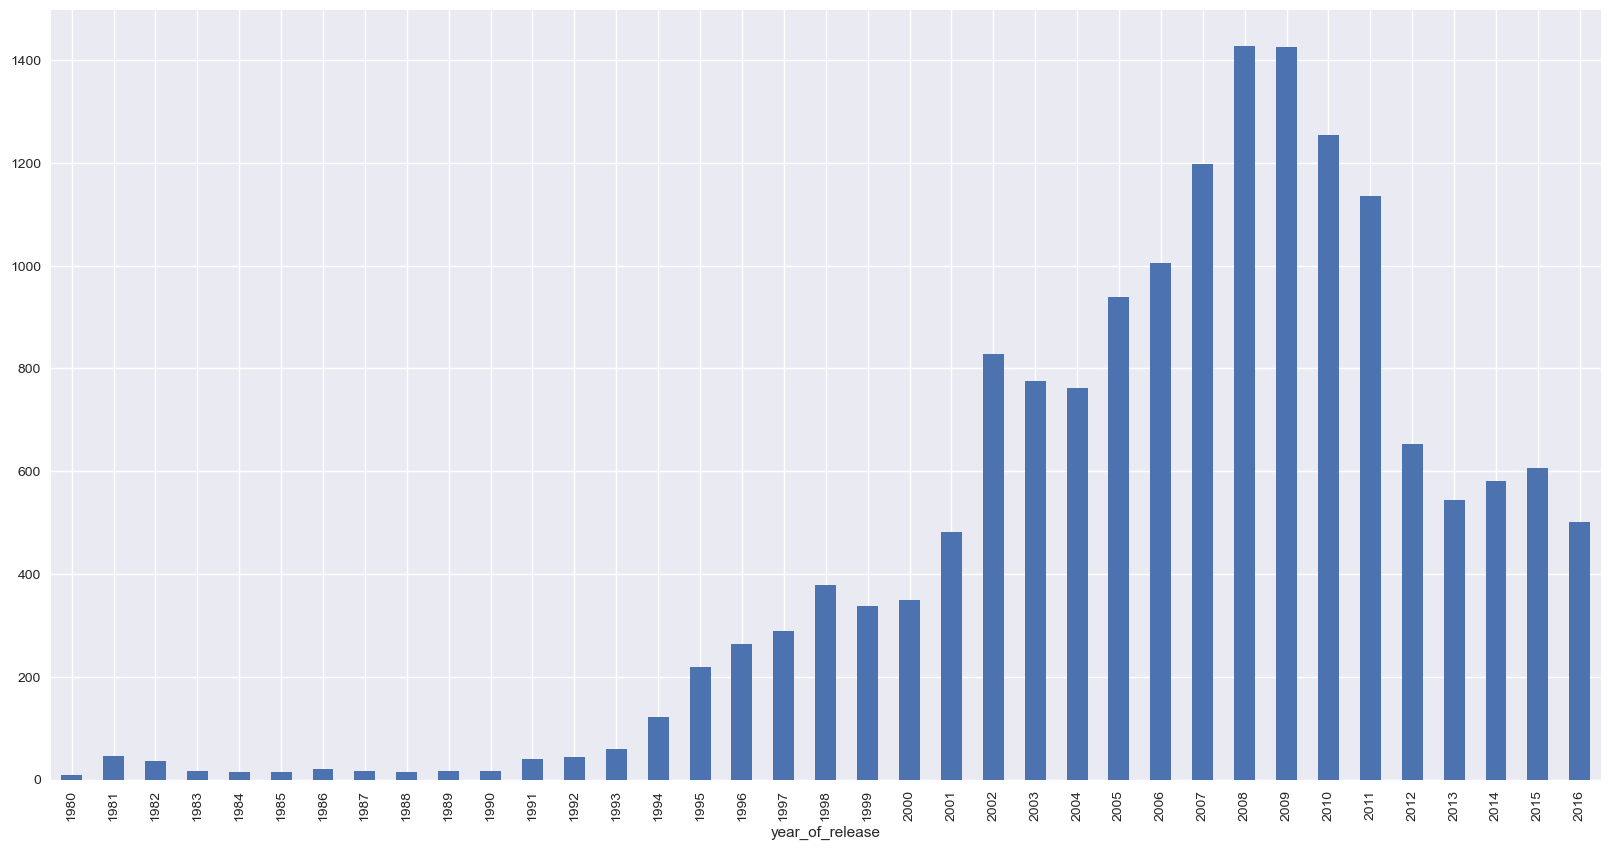

In [82]:

plt.style.use('seaborn')  #https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
df_plot = df.groupby('year_of_release')['name']
df_plot = df_plot.count()
plot = df_plot.plot(kind='bar', y='name', figsize=(20,10))


**Conclusion**

The number of games grew until 2009-2010. Since then, there has been a sharp decline by 2013 and a steady decline by 2016. It can be assumed that the sharp drop is caused by an increase of sales of mobile devices. Then the relevant period for the study will be from 2013-2016, when the market stabilized.

### Changing of sales by platform

In [83]:
#looking at total sales by platform that where leading since 1984
df.groupby('platform')['sales_total'].sum().to_frame('sales_total')\
            .sort_values(by='sales_total', ascending=False).head()



,sales_total
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


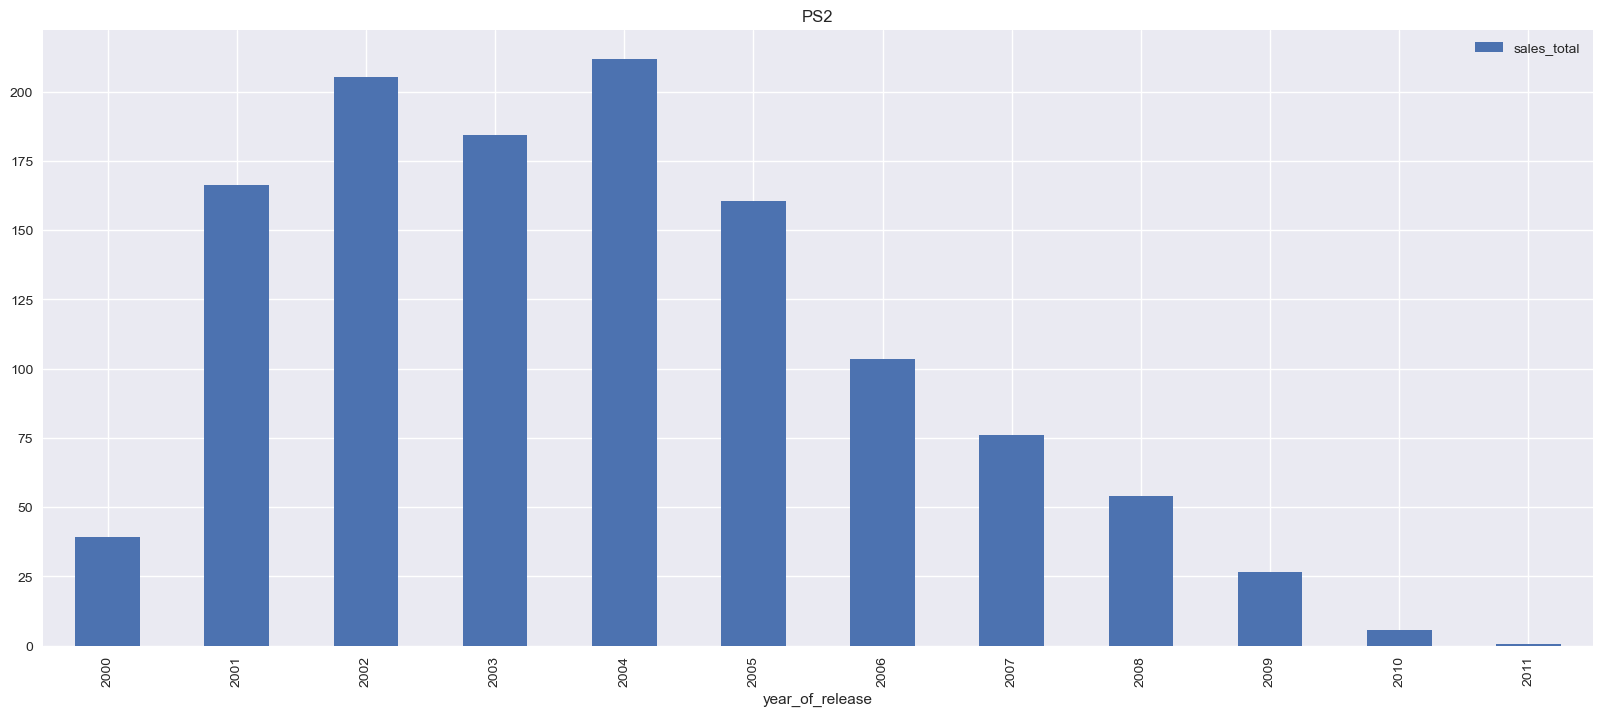

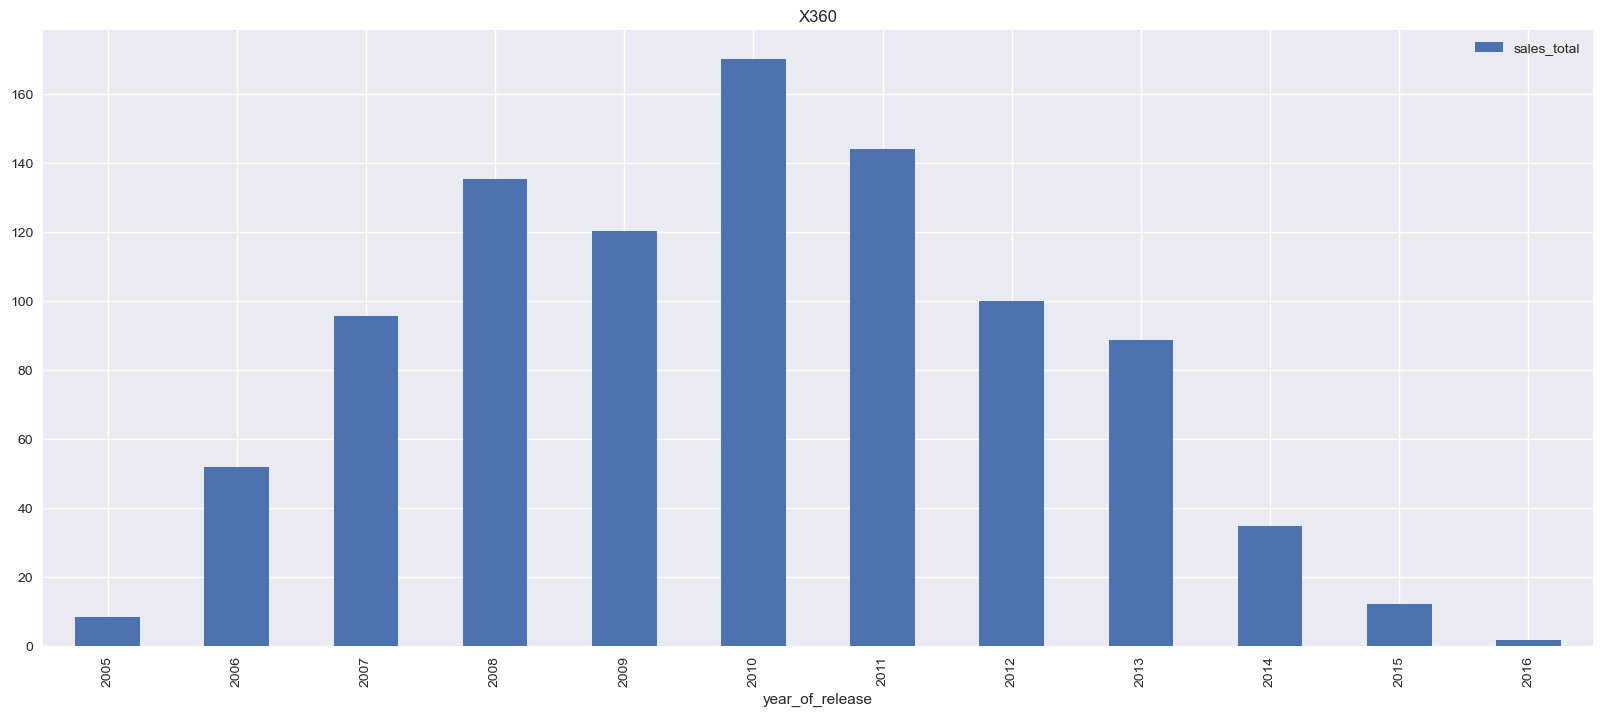

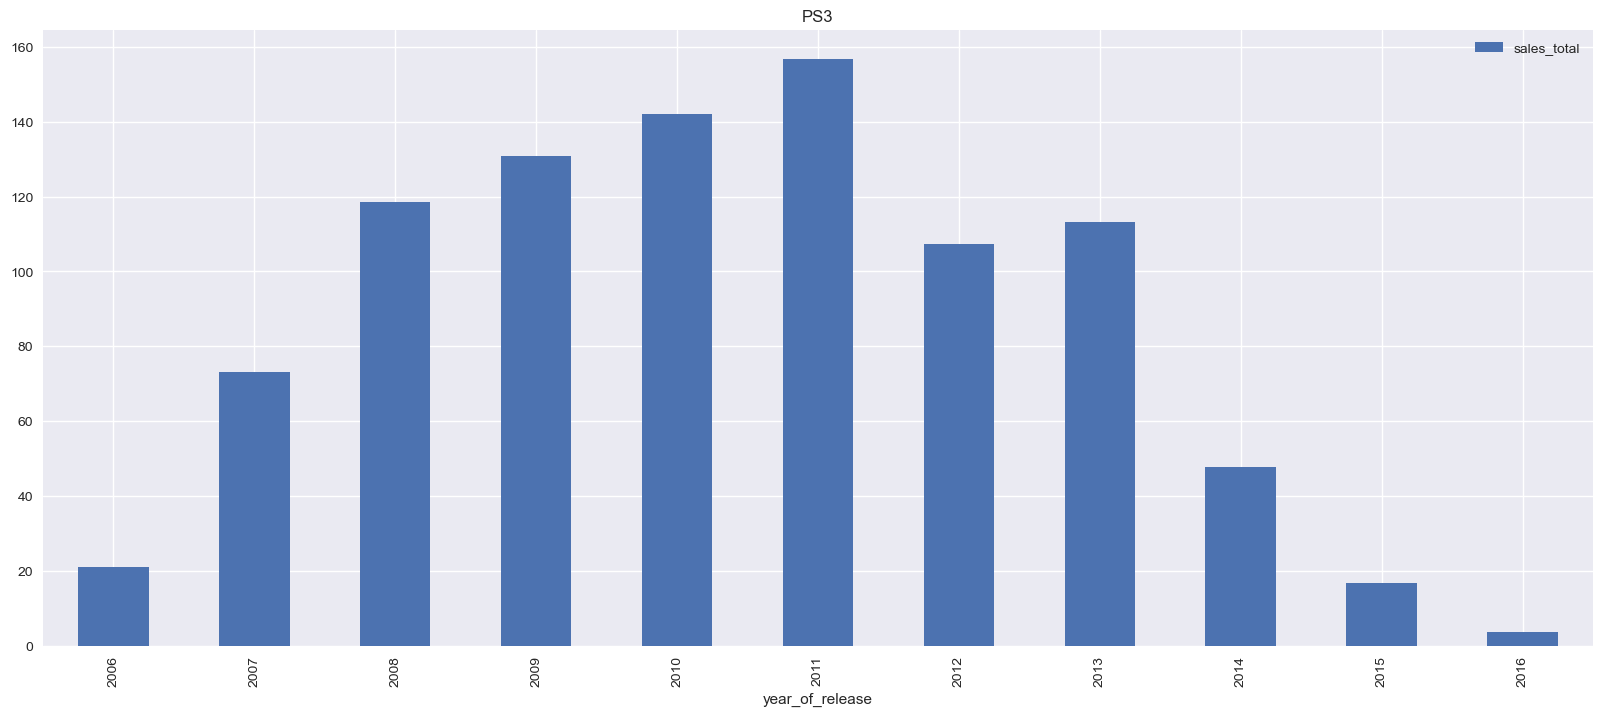

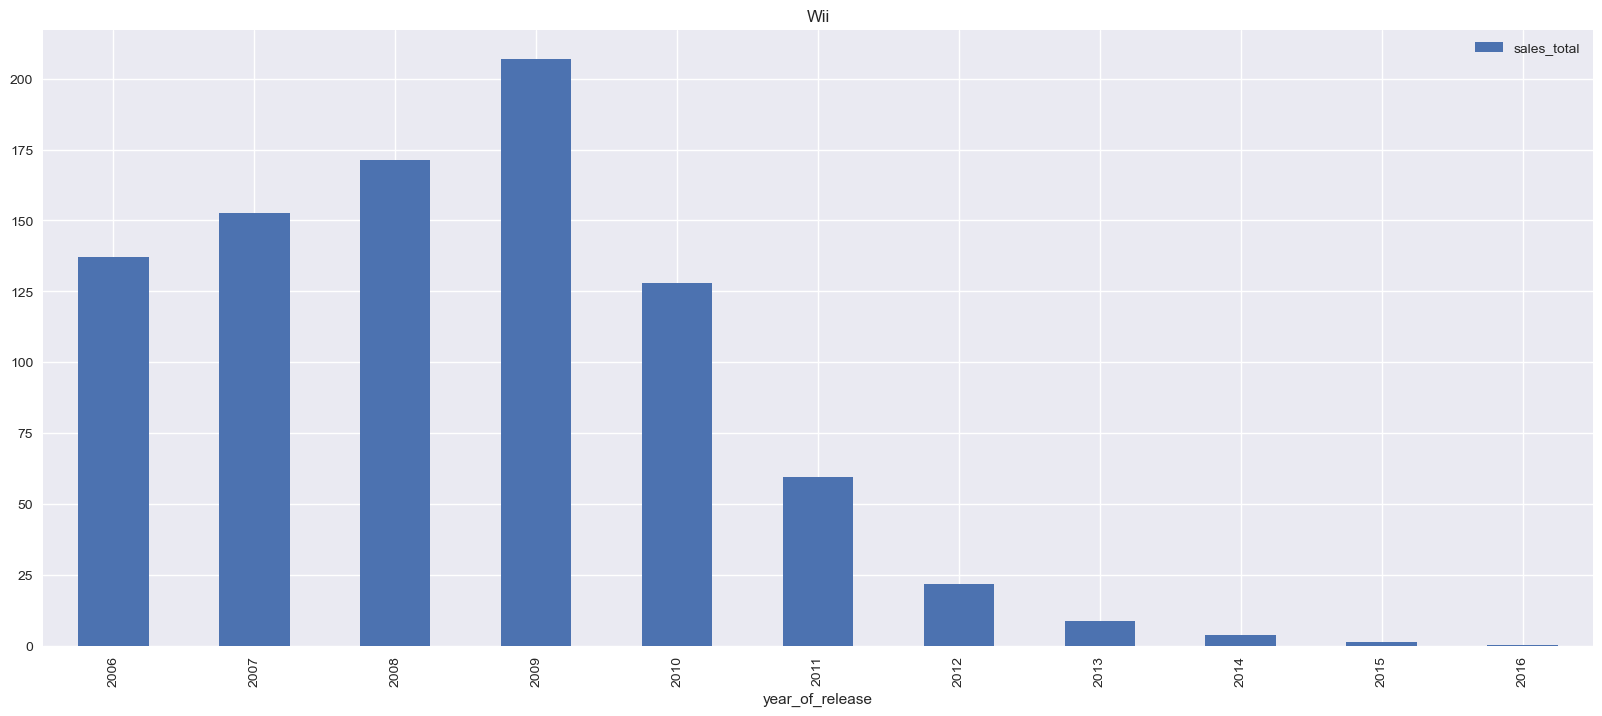

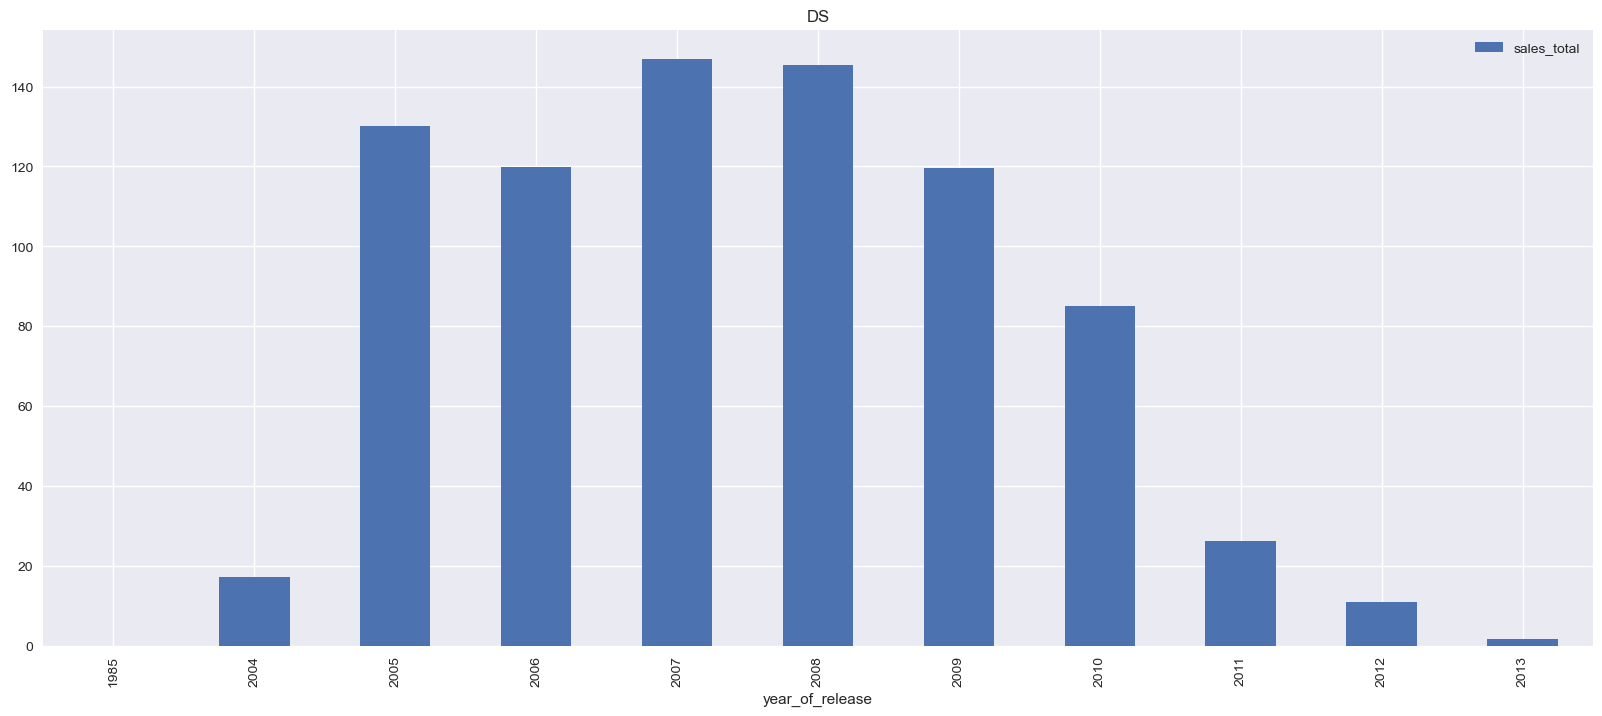

In [84]:
# building for bar for top 5 platforms
for pl in ['PS2','X360','PS3','Wii','DS']:
    df[df['platform'] == pl].groupby('year_of_release').agg({'sales_total':'sum'})\
    .plot(kind='bar',title = pl, figsize=(20,8))


**Conclusions**

From the previous paragraph, changes in the market since 2012 are obvious, so it is more correct to look at sales for the current period.
And  approximate lifetime of the platforms is about 10 years.

###  Data analysis for chosen actual period of time

From previous research, it can be assumed that the stabilization of the market occurred around 2013.
Let's create a separate dataframe for this period. On the other hand, the lifetime of the platforms is 10 years. They reach the peak of growth in 4-5 years from the beginning of their existence. We are interested in year 2017. So we will take 2013 as the beginning of the current period.

In [104]:
df_y = df[(df.year_of_release > 2013)]
df_y.reset_index(drop=True,inplace=True)

In [86]:
#checking the resulting table
df_y.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,star wars battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98


In [87]:
#checking the resulting table
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  sales_total      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


In [88]:
#checking the number of unique platform names
len(df_y['platform'].unique())

10

There is a lot less data in the table, and there are only two fewer platforms. It can be assumed that among them there are a lot of that are ending their existence. Let's check the sales leaders in these years.

<AxesSubplot:xlabel='platform'>

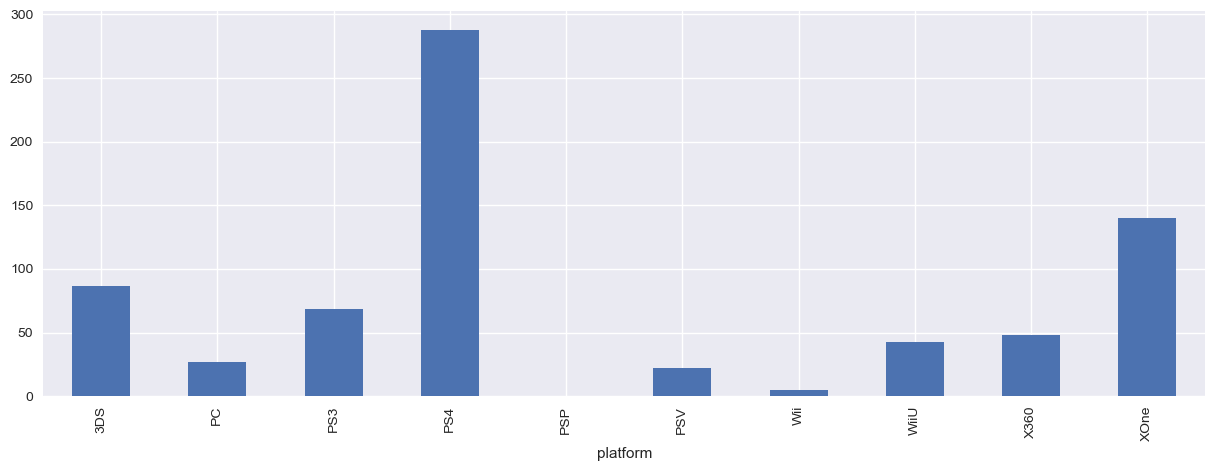

In [89]:
df_y.groupby('platform')['sales_total'].sum().plot(kind='bar', figsize=(15,5))

In [90]:
#sales per each platform per year
sales_per_year=df_y.groupby(['platform','year_of_release']).agg(sales_per_year=('sales_total', 'sum'))
sales_per_year

sales_per_year
platform year_of_release                
3DS      2014                      43.76
         2015                      27.78
         2016                      15.14
PC       2014                      13.28
         2015                       8.52
         2016                       5.25
PS3      2014                      47.76
         2015                      16.82
         2016                       3.60
PS4      2014                     100.00
         2015                     118.90
         2016                      69.25
PSP      2014                       0.24
         2015                       0.12
PSV      2014                      11.90
         2015                       6.25
         2016                       4.25
Wii      2014                       3.75
         2015                       1.14
         2016                       0.18
WiiU     2014                      22.03
         2015                      16.35
         2016                       4.60
X360     2014                      34.74
         2015                      11.96
         2016                       1.52
XOne     2014                      54.07
         2015                      60.14
         2016                      26.15

In [91]:
#total sales by platform
df_y.groupby('platform')['sales_total'].sum().to_frame('sales_total')\
            .sort_values(by='sales_total', ascending=False).head(5)

,sales_total
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


In [92]:
#sales data for 2016
df_2016=df[(df.year_of_release == 2016)]

In [93]:
df_2016.groupby('platform')['sales_total'].sum().to_frame('sales_total')\
            .sort_values(by='sales_total', ascending=False).head(5)

,sales_total
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60


Thus, we can assume that the three best-selling platforms in 2017 will be those
that did not show a strong drop and are the best-selling in 2016: PS4, XOne, 3DS.

### Boxplot for actual period

(0.0, 1.75)

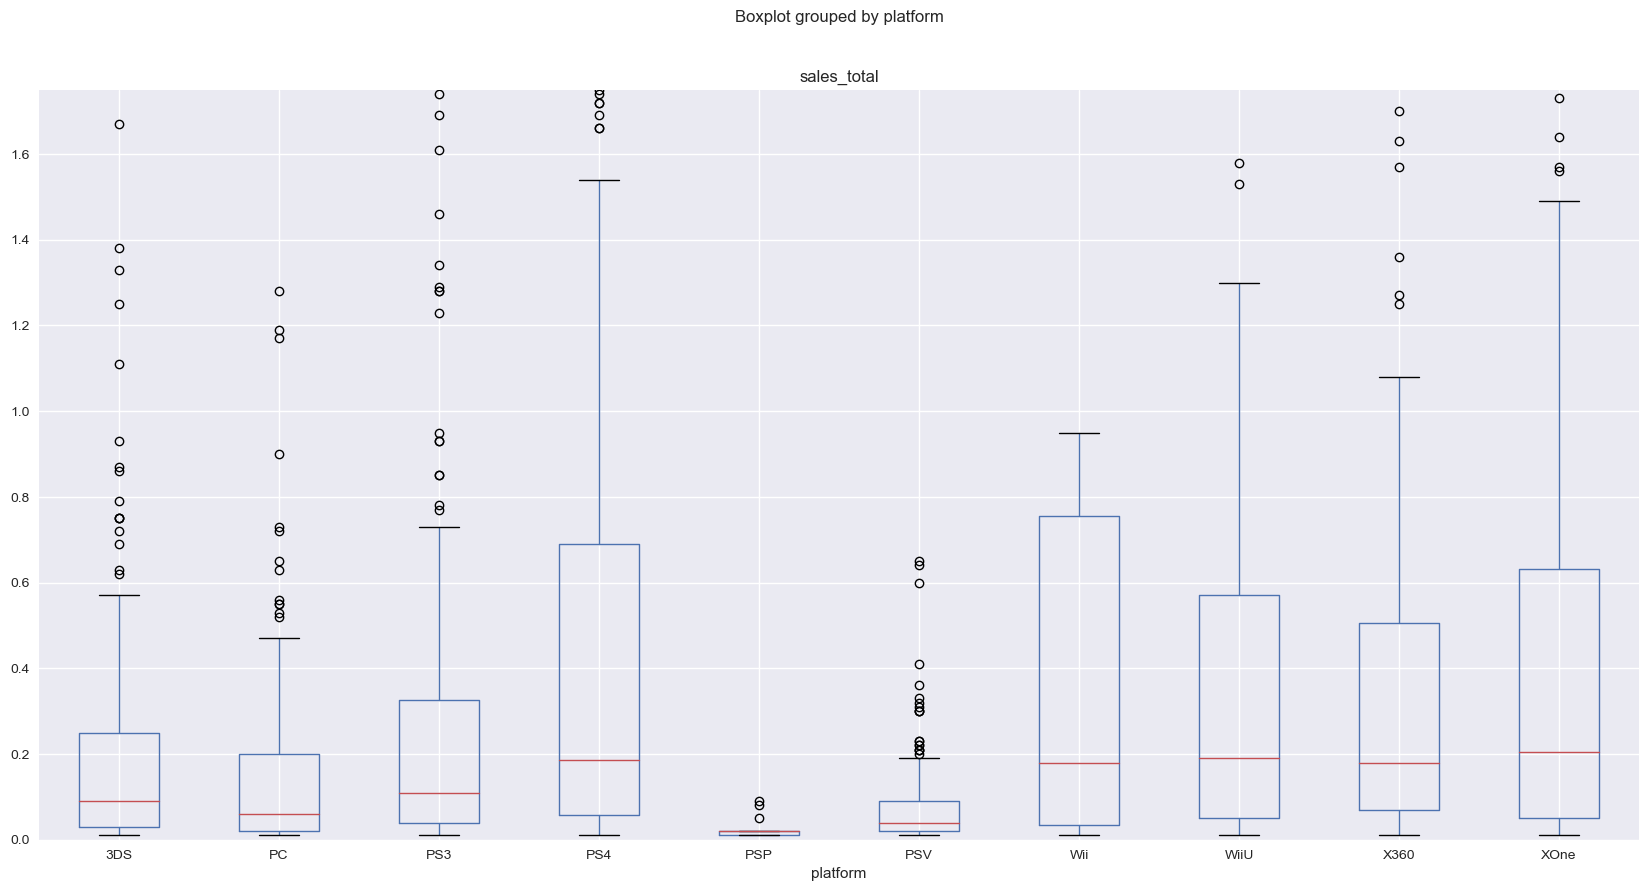

In [94]:
df_y.boxplot(column=['sales_total'], by='platform',figsize=(20,10)).set_ylim(0, 1.75)

For the current period, the median value of sales for the leaders is approximately 0.2 millions. 
The most popular games for the desired period are PS4, XOne, 3DS. We ca see as well best selling games.
Let's see how they were influenced by users' and critics' reviews.

### Dependence of sales on reviews within popular platforms

In [95]:
df_y.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,star wars battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98


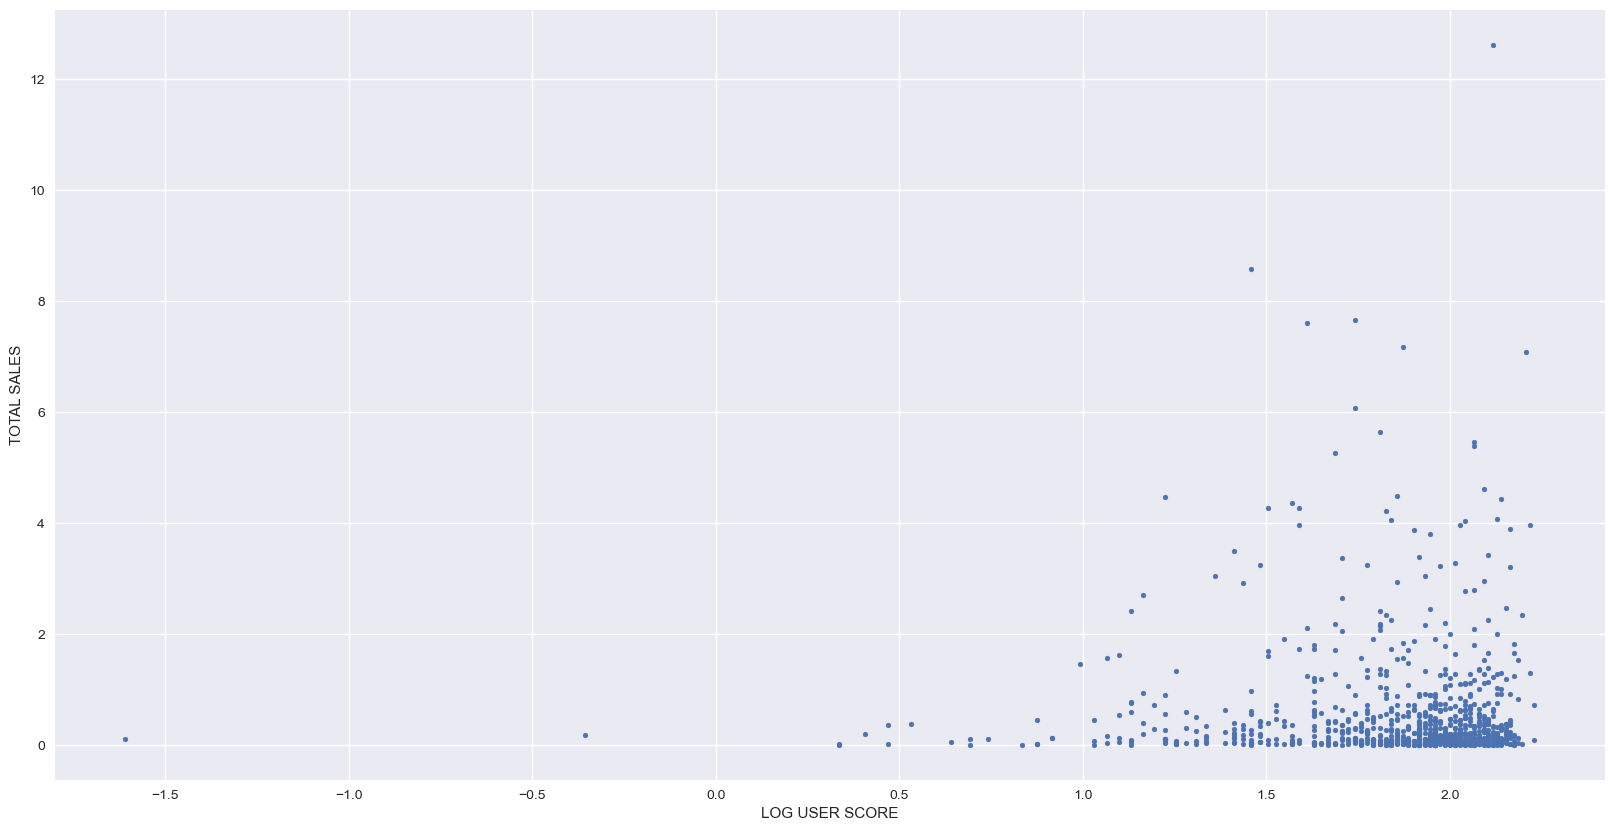

In [98]:
# scatter correlation plot for total sales /user_score
ys = df_y['sales_total']
xs = df_y['user_score'].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True, figsize=(20,10))
plt.xlabel('LOG USER SCORE')
plt.ylabel('TOTAL SALES')
plt.show()

In [97]:
#calculating value of correlation
df_y['sales_total'].corr( df_y['user_score'].apply(np.log))

0.0019659616779721676

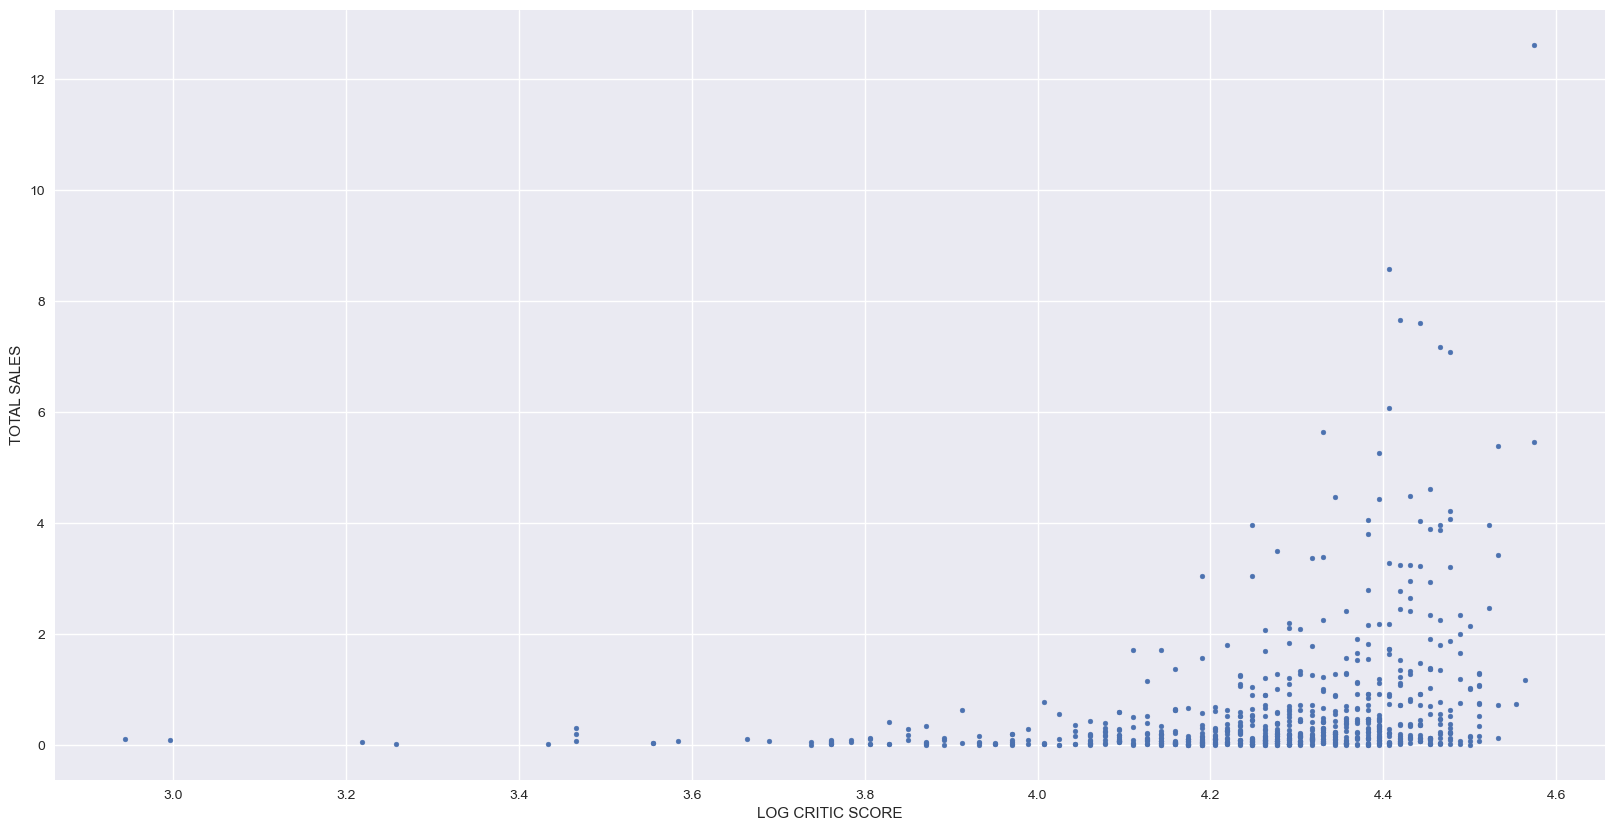

In [99]:
# scatter correlation plot for total sales /critic_score
ys = df_y['sales_total']
xs = df_y['critic_score'].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True,figsize=(20,10))
plt.xlabel('LOG CRITIC SCORE')
plt.ylabel('TOTAL SALES')
plt.show()

In [100]:
#calculating value of correlation
df_y['sales_total'].corr( df_y['critic_score'].apply(np.log))

0.289354110320557

critic_score for PS4
Correlation 0.3423581663069408


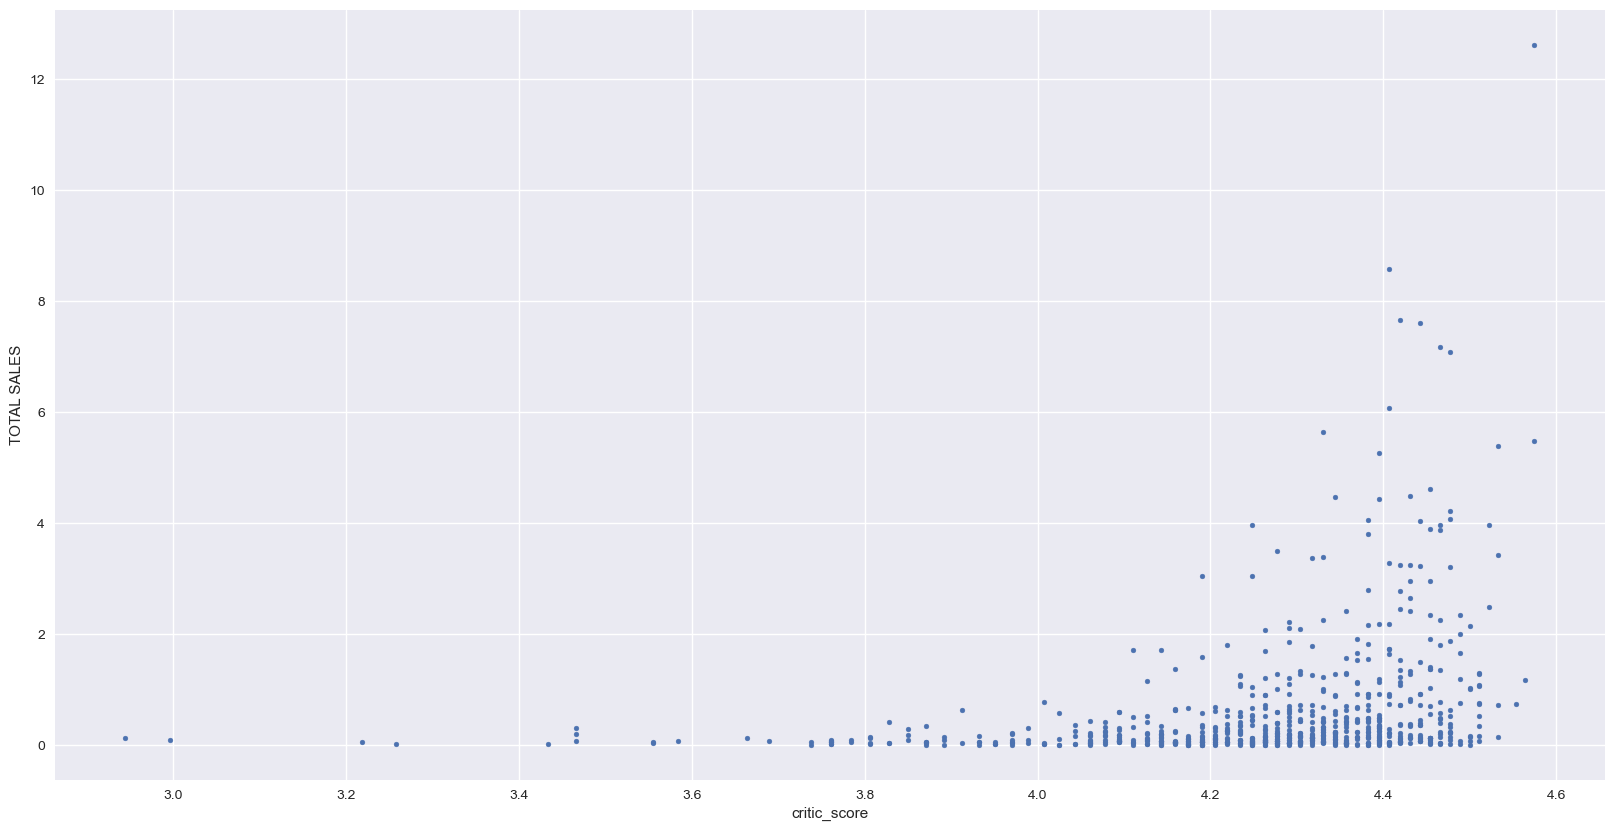

user_score for PS4
Correlation -0.021980711523458426


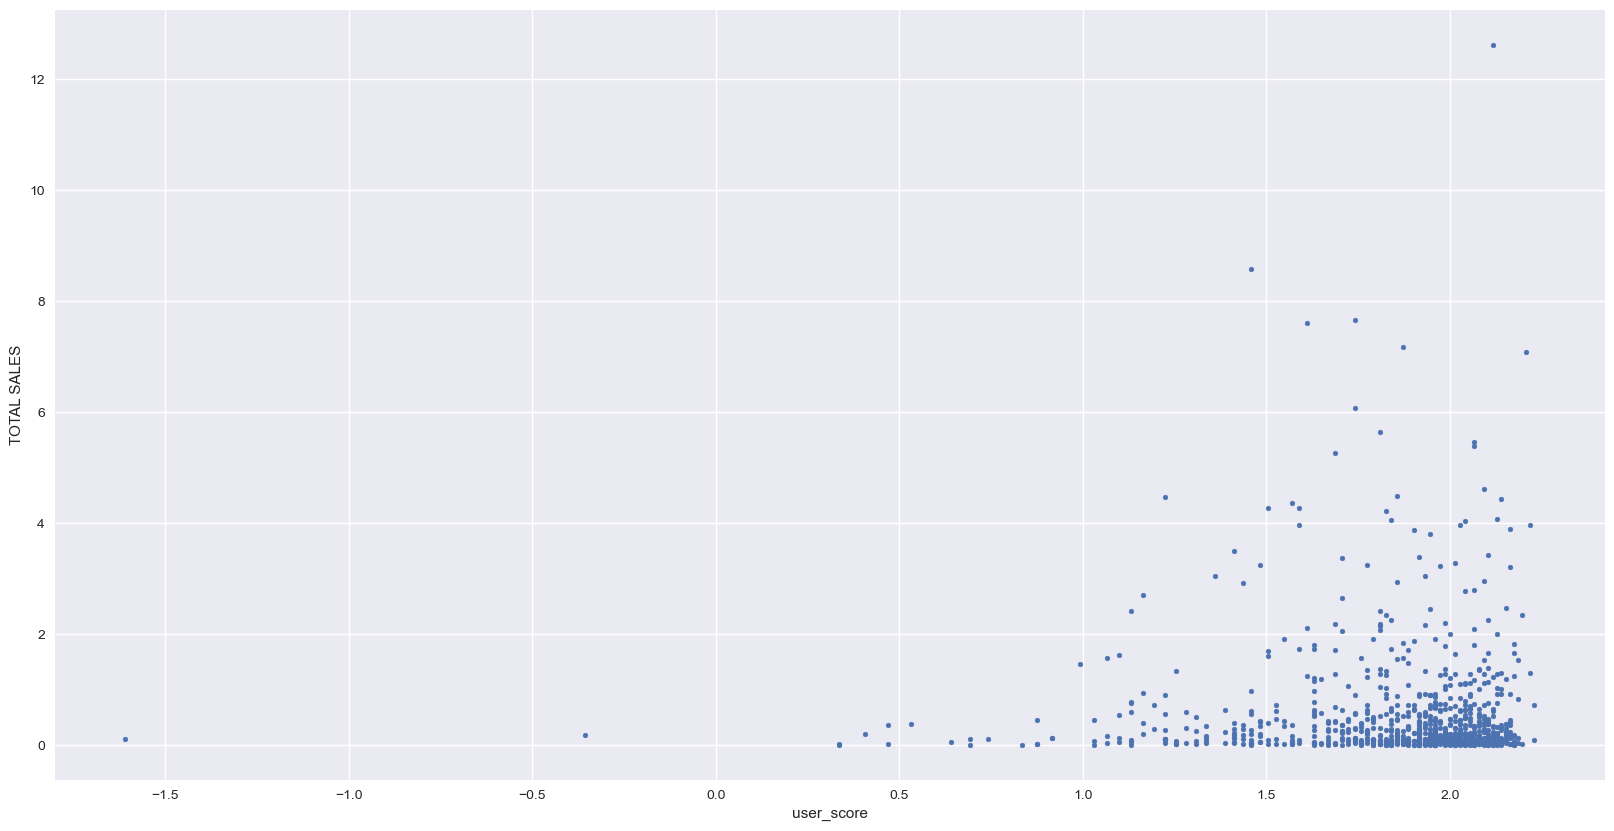

critic_score for XOne
Correlation 0.37925698463908164


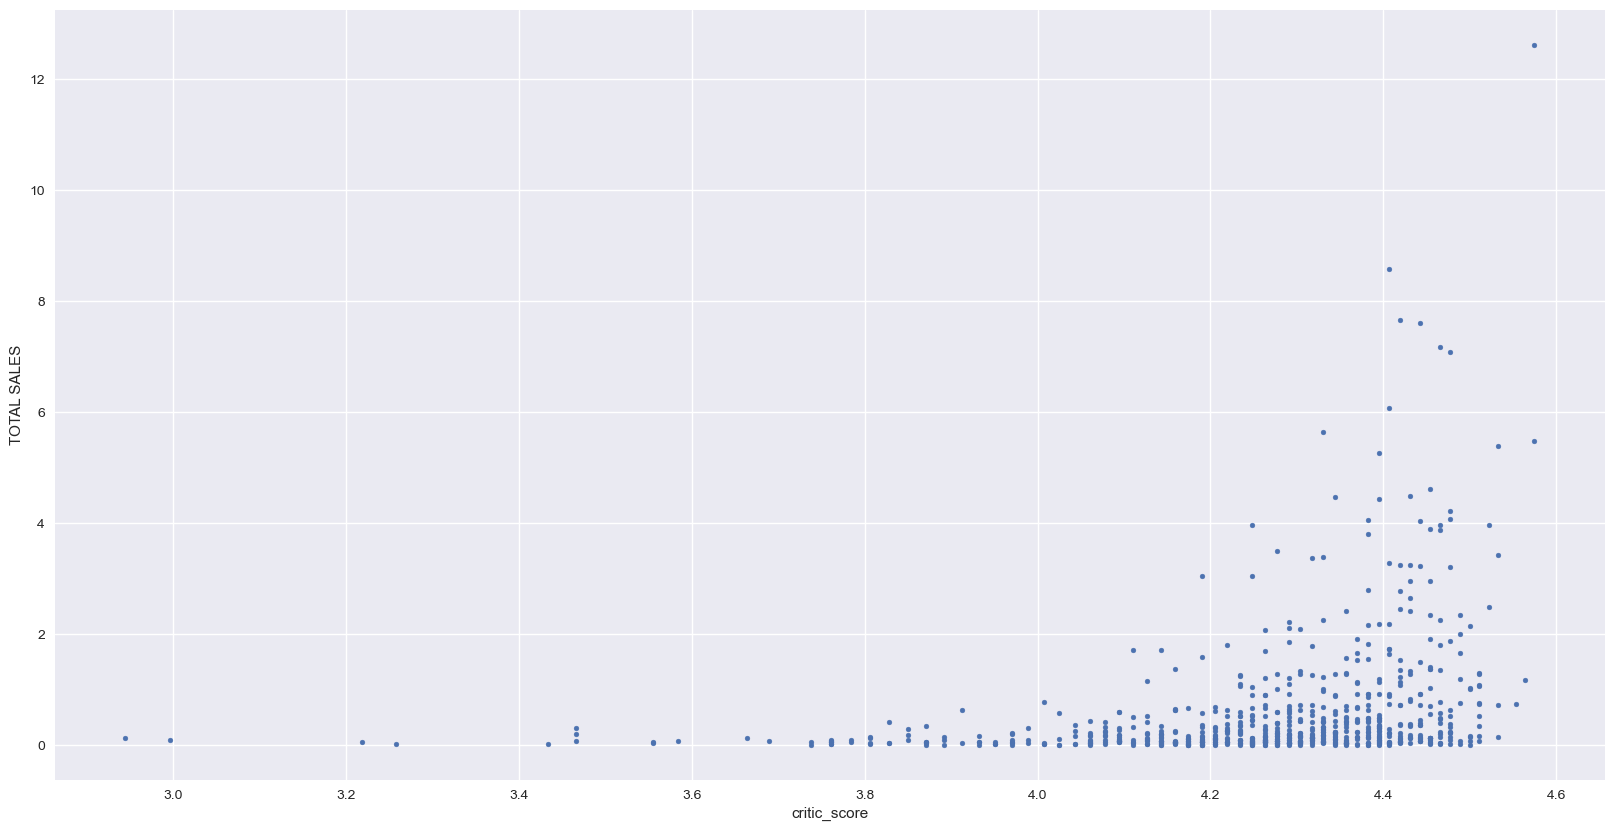

user_score for XOne
Correlation -0.04226015955606914


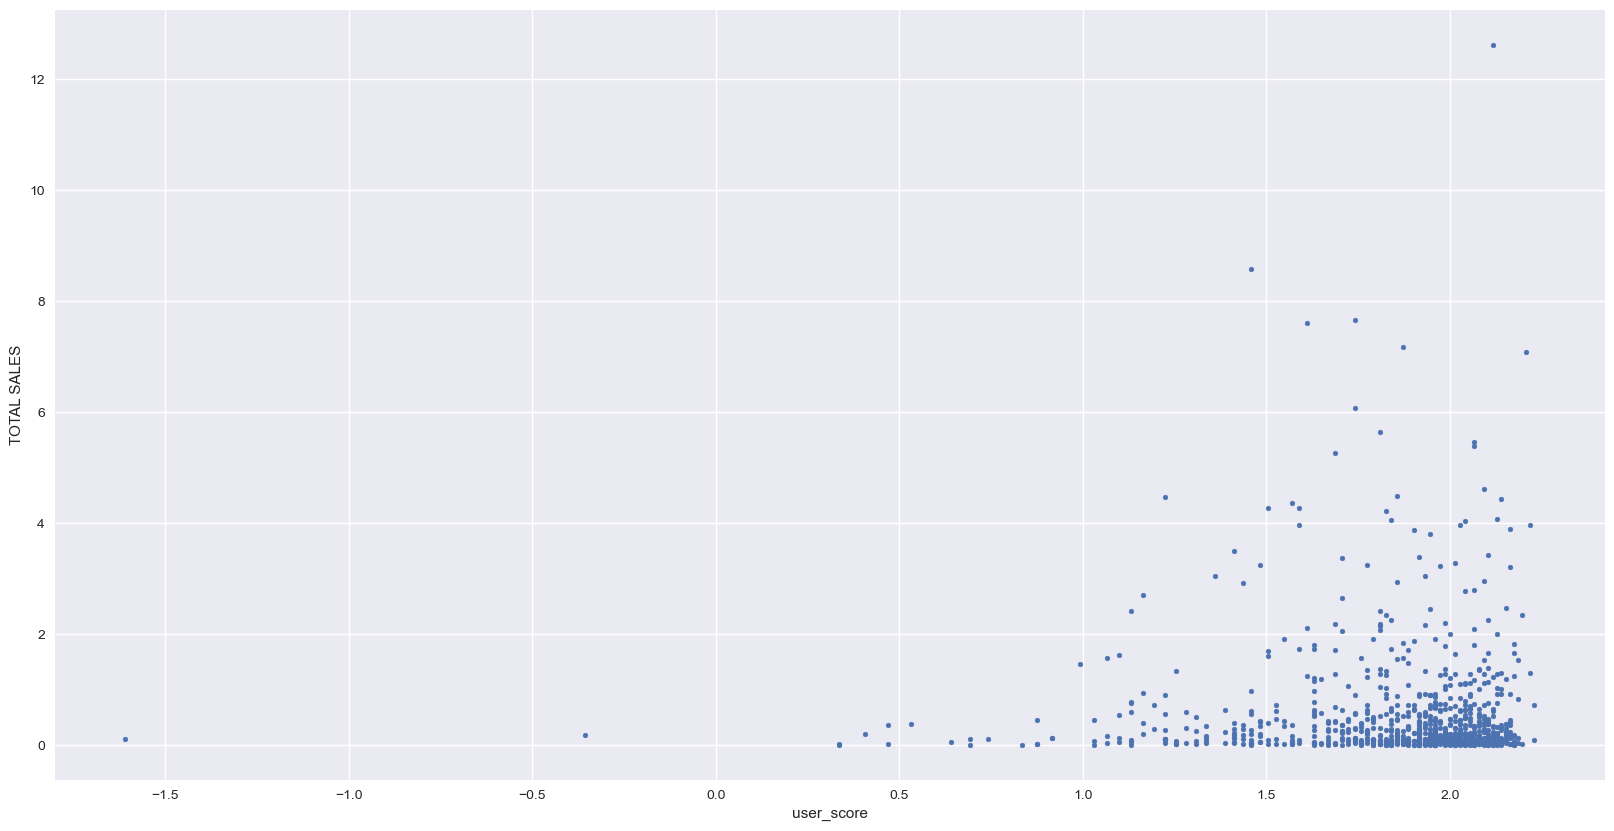

critic_score for 3DS
Correlation 0.2858221780229288


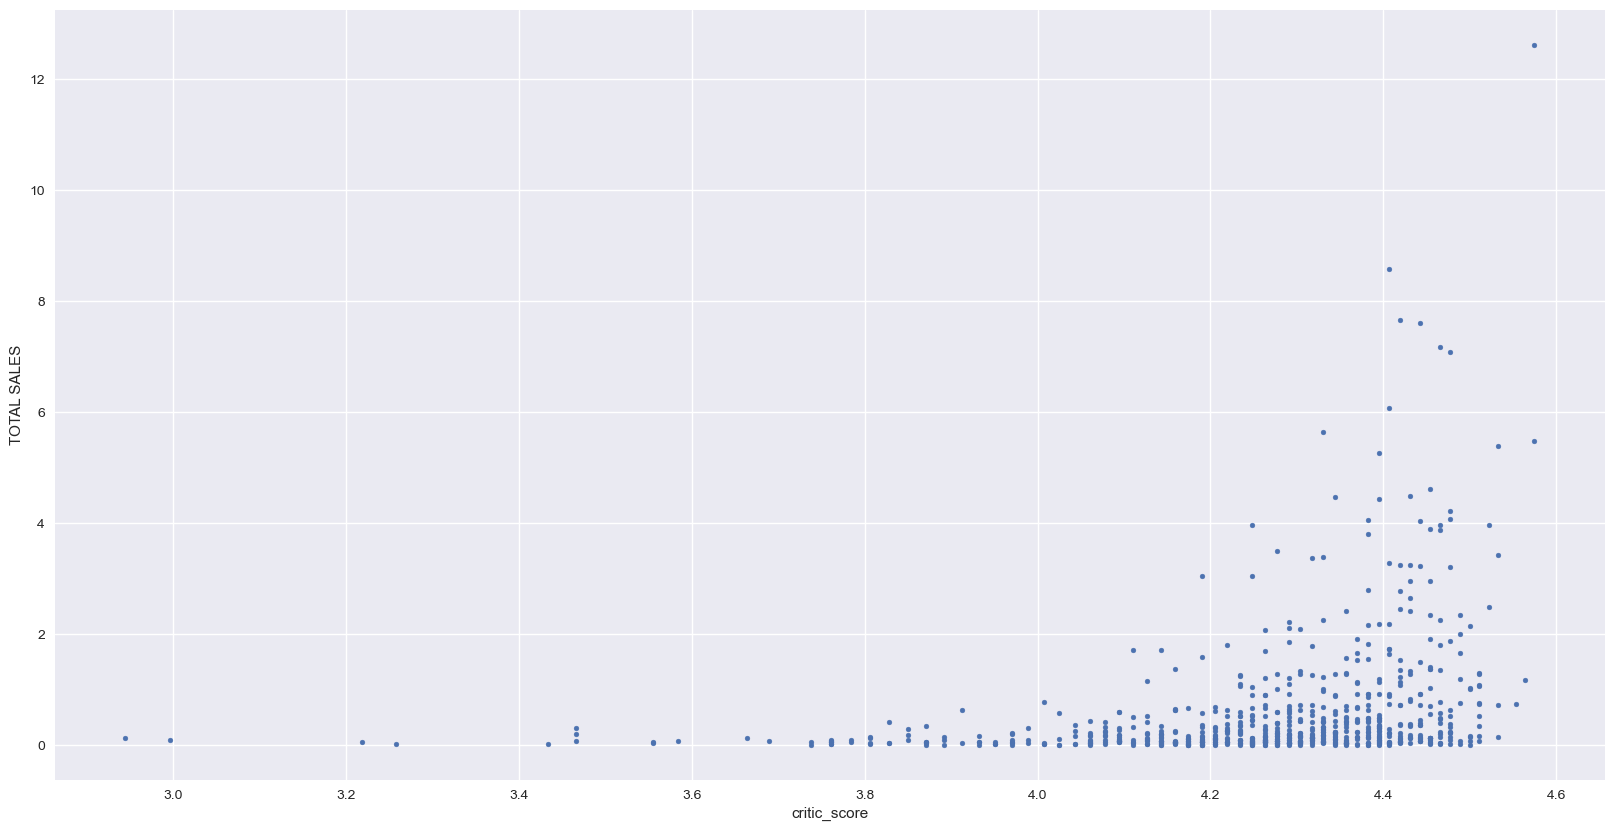

user_score for 3DS
Correlation 0.18150231767308678


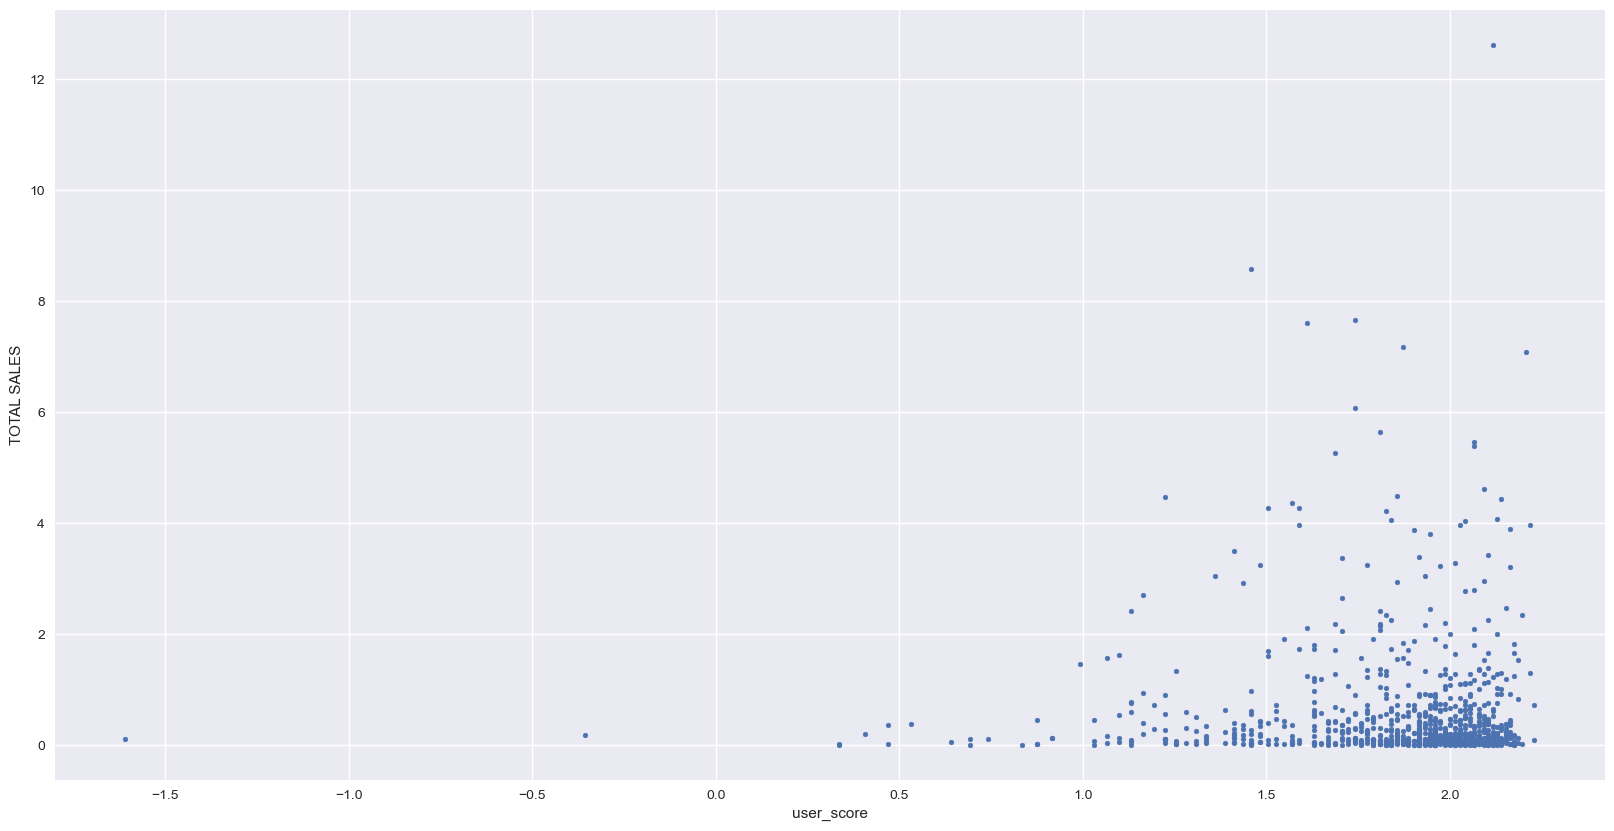

In [101]:
#calculating correlation for each of popular platforms
for popular in [ 'PS4', 'XOne', '3DS']:
    for score in ['critic_score','user_score']:
        df_p=df_y[(df_y['platform'] == popular) & (df_y[score] > 0)]
        ys = df_y['sales_total']
        xs = df_y[score].apply( np.log )
        corr=df_p['sales_total'].corr( df_p[score].apply(np.log))
        print(score,'for',popular)
        print('Correlation',corr)
        pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True,figsize=(20,10))
        plt.xlabel(score)
        plt.ylabel('TOTAL SALES')
        plt.show()


**Conclusion**

There is a weak correlation with the critics' rating. It does not correlate with the user rating. Perhaps there is some dependency, but it is nonlinear.

### The most profitable genre for actual period

<AxesSubplot:xlabel='genre'>

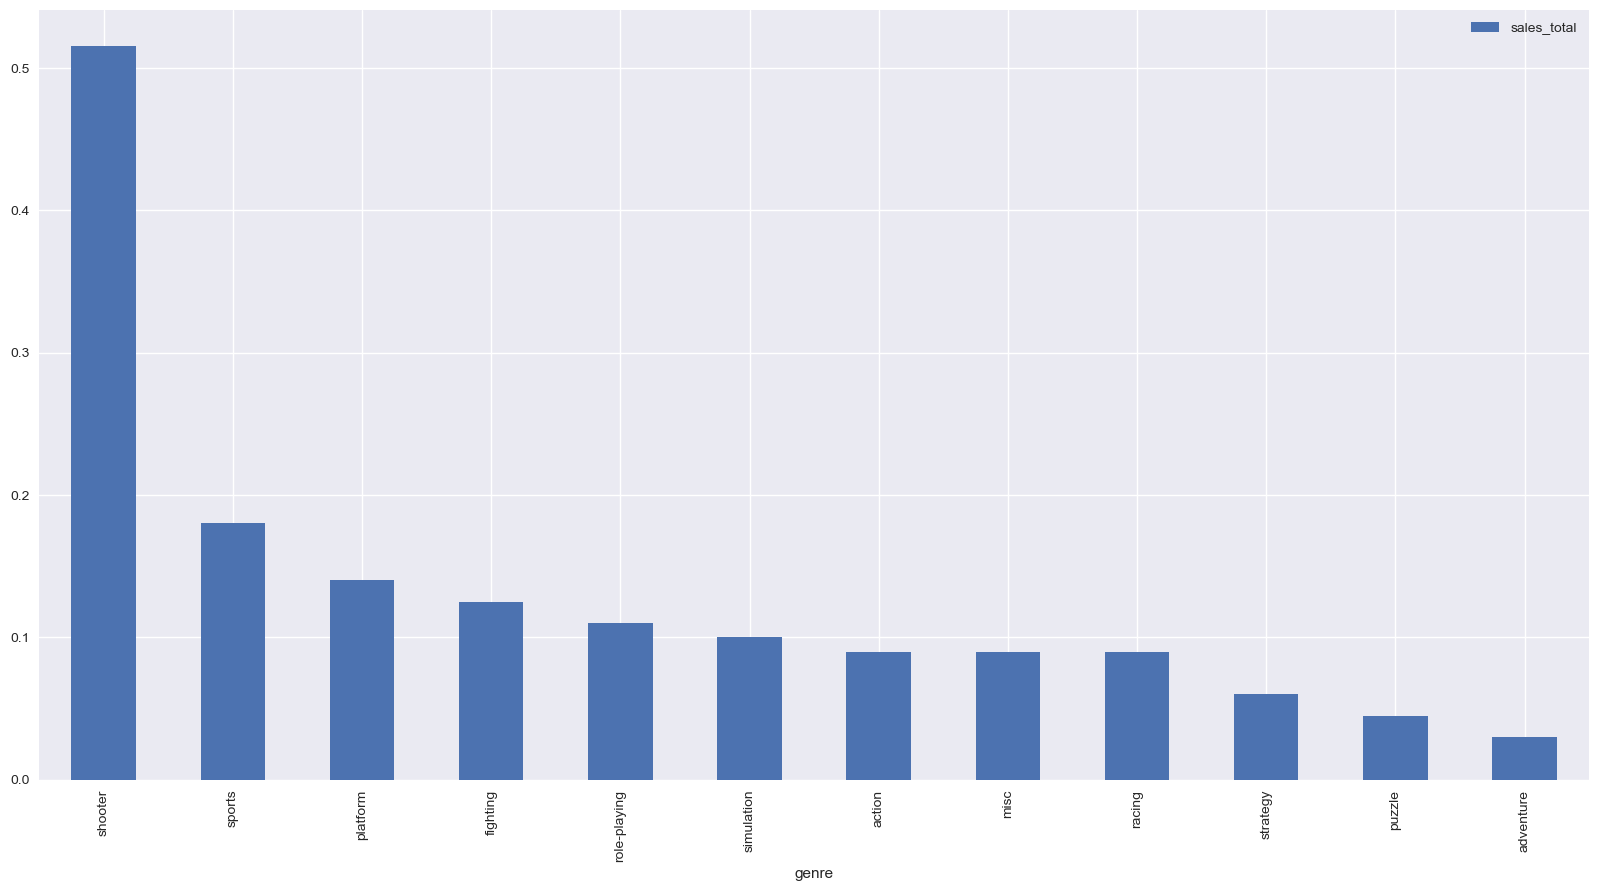

In [102]:
pivot = df_y.groupby('genre').agg({'sales_total': 'median'}).sort_values(by='sales_total', ascending=False)
pivot.plot(kind='bar', figsize=(20,10))

According to median sales shooter games leading.

**Conclusion**
 
- The number of games grew until 2009-2010. Since then, there has been a sharp decline by 2013 and a steady decline by 2016. It can be assumed that the sharp drop is caused by an increase in sales of mobile devices and part of the games moved to mobile devices. Then the relevant period for the study will be from 2013-2016, when the market stabilized.

- From 1984-2016, the following platforms were in the lead: PS2,X360,PS3,Wii,DS

The current period is defined as the period of stabilization of decline in sales on platforms since 2013:

- There are no platforms growing in sales. The peaks of growth in 2014 showed: PS4 and XOne. Thus, it can be assumed that the most promising sales in 2017 will be those platforms that did not show a strong drop in 2016. That is, the leaders in sales in 2016.

- PS4, XOne, 3DS are expected to show good sales in 2017, as the platform market is falling.

- For the current period, the median value of sales for the leaders is approximately 0.2 million dollars.

- There is a weak correlation with the critics' rating. It does not correlate with the user rating. Perhaps there is some dependency, but it is nonlinear.

- The highest sales in the genre of action, shooter and sports. The lowest in the puzzle genre (we can assume that this genre has definitely migrated to mobile devices). The highest median sales show shooter.


## Portrait of the user of each region


In [105]:
df_y.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
1,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
2,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
3,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
4,star wars battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98


<AxesSubplot:title={'center':'Japan'}, xlabel='platform'>

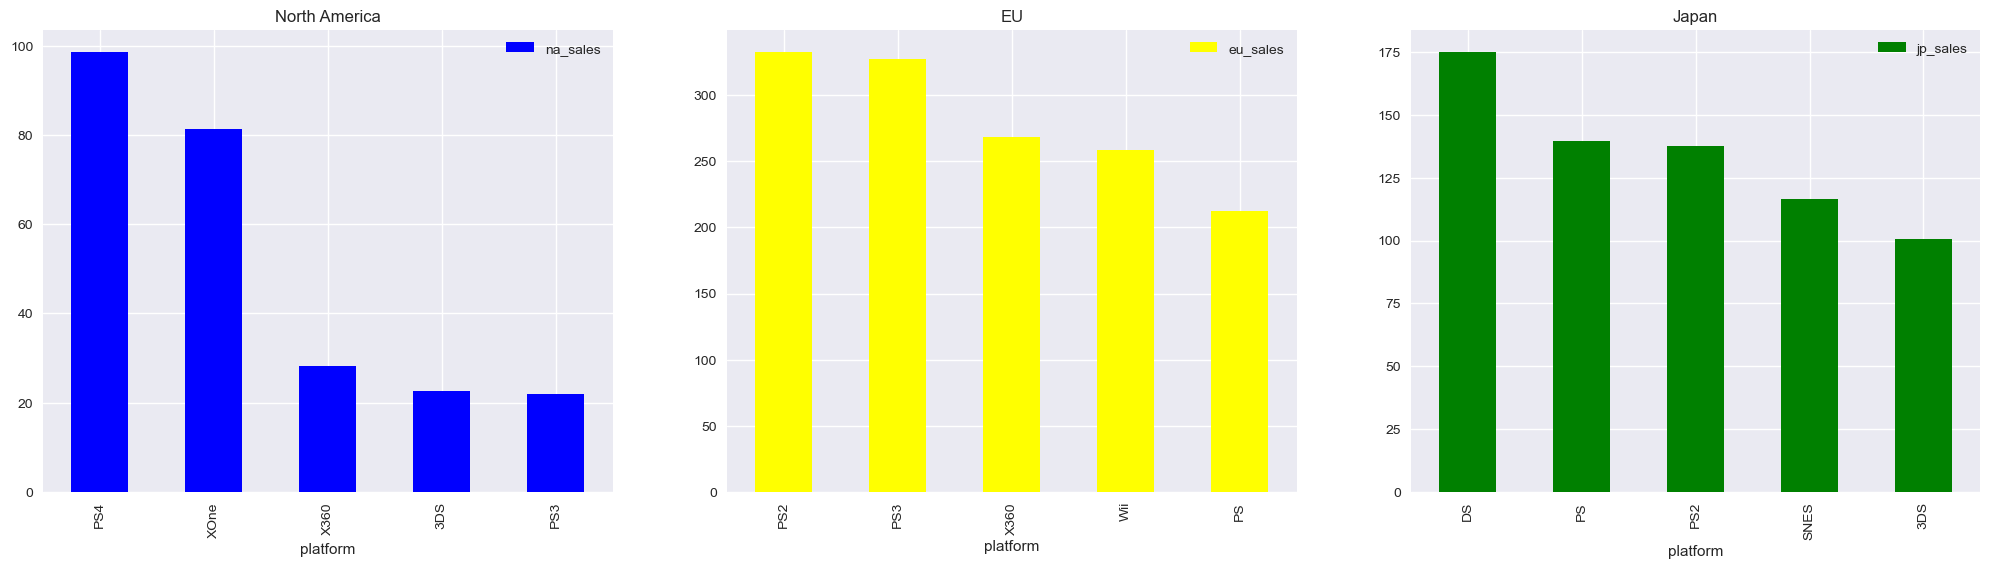

In [106]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

df_y.groupby(by='platform').agg({'na_sales':'sum'}).\
   sort_values(by='na_sales', ascending=False).head(5).\
   plot(kind='bar',title= 'North America', ax=axes[0], color='blue')

df.groupby(by='platform').agg({'eu_sales':'sum'}).\
   sort_values(by='eu_sales', ascending=False).head(5).\
   plot(kind='bar',title= 'EU', ax=axes[1], color='yellow')

df.groupby(by='platform').agg({'jp_sales':'sum'}).\
   sort_values(by='jp_sales', ascending=False).head(5).\
   plot(kind='bar',title= 'Japan', ax=axes[2], color='green')


For North America the PS4 is the leader, for Europe - the PS2, and for Japan - the DS.
It can be assumed that the difference between Europe and North America is caused by the difference in the level of average income (in the USA and Canada average income are higher than in Europe) and the consumer culture is different. 
For Japan, it can be assumed that its cultural characteristics play a role here: traditional culture and the difficult rejection of old software.


<AxesSubplot:title={'center':'Japan'}, xlabel='genre'>

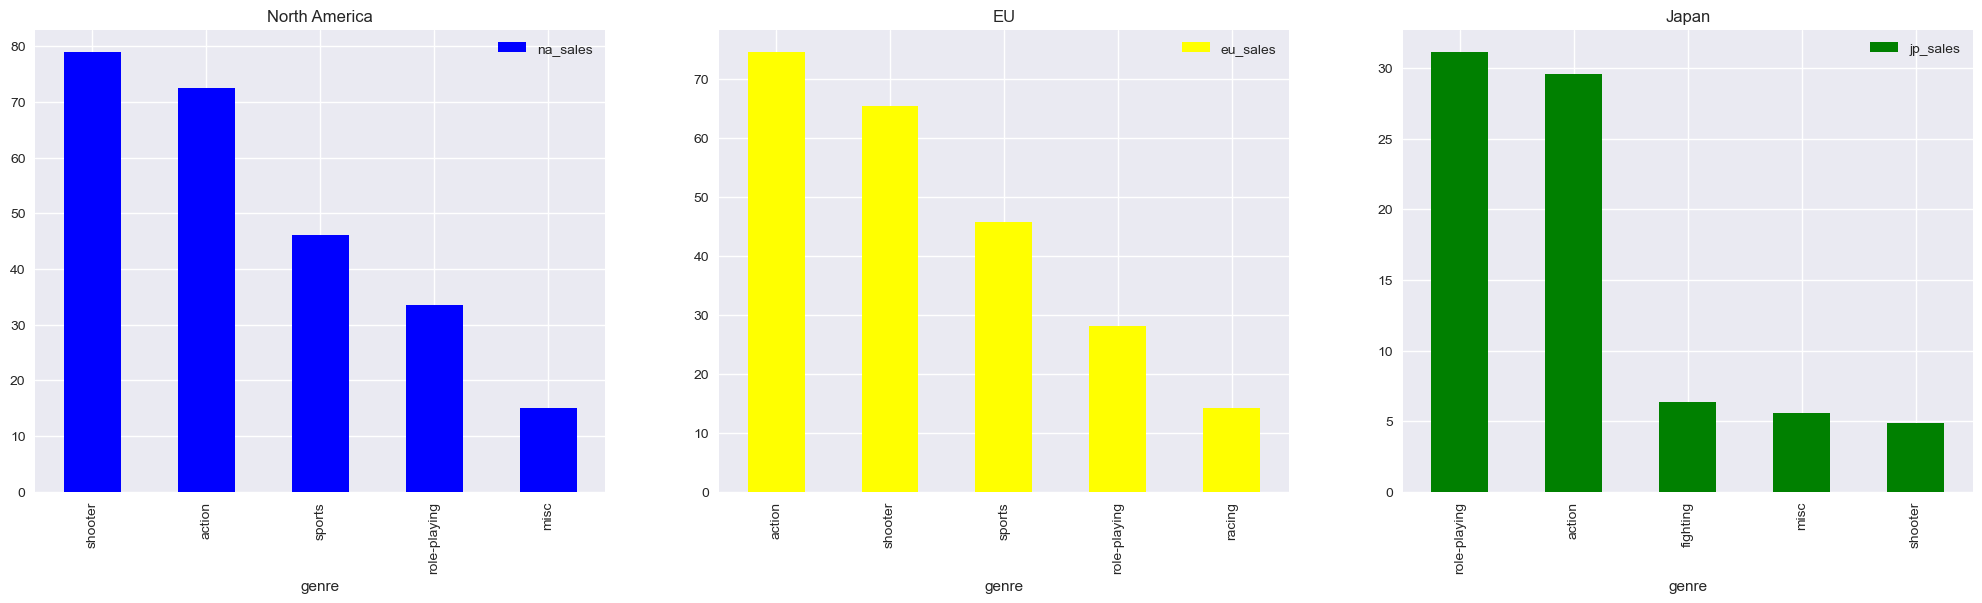

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

df_y.groupby(by='genre').agg({'na_sales':'sum'}).\
   sort_values(by='na_sales', ascending=False).head(5).\
   plot(kind='bar',title= 'North America', ax=axes[0], color='blue')

df_y.groupby(by='genre').agg({'eu_sales':'sum'}).\
   sort_values(by='eu_sales', ascending=False).head(5).\
   plot(kind='bar',title= 'EU', ax=axes[1], color='yellow')

df_y.groupby(by='genre').agg({'jp_sales':'sum'}).\
   sort_values(by='jp_sales', ascending=False).head(5).\
   plot(kind='bar',title= 'Japan', ax=axes[2], color='green')

The top 3 in North America and Europe include: action, shooter, sports. But due to cultural peculiarities and the culture of weapons, shooter is in the first place in the USA, and action is in Europe.
In Japan, the leader is role-play. It can be assumed that this is due to the rich culture of cosplay.

<AxesSubplot:title={'center':'Japan'}, xlabel='rating'>

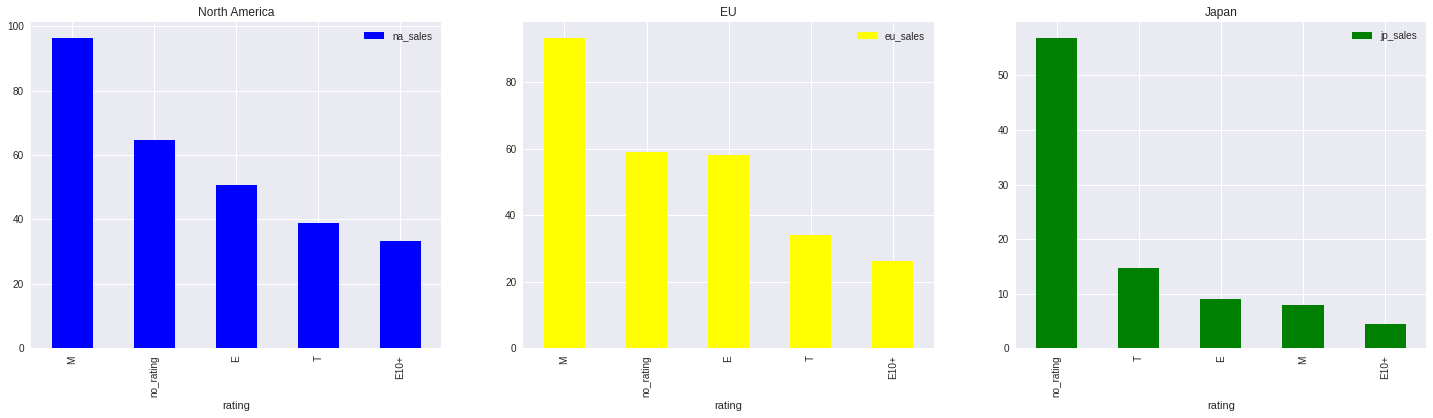

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

df_y.groupby(by='rating').agg({'na_sales':'sum'}).\
   sort_values(by='na_sales', ascending=False).head(5).\
   plot(kind='bar',title= 'North America', ax=axes[0], color='blue')

df_y.groupby(by='rating').agg({'eu_sales':'sum'}).\
   sort_values(by='eu_sales', ascending=False).head(5).\
   plot(kind='bar',title= 'EU', ax=axes[1], color='yellow')

df_y.groupby(by='rating').agg({'jp_sales':'sum'}).\
   sort_values(by='jp_sales', ascending=False).head(5).\
   plot(kind='bar',title= 'Japan', ax=axes[2], color='green')

The share of sales by ratings in Europe and the USA does not differ at all: M(mature), without a rating, E(everybody)
In Japan the share of sales by ratings is led by games without a rating.

**Conclusion**

For North America the PS4 is the leader, for Europe - the PS2, and for Japan - the DS. It can be assumed that the difference between Europe and North America is caused by the difference in the level of average income (in the USA and Canada average incomes are higher than in Europe) and the consumer culture is different. For Japan, it can be assumed that its cultural characteristics play a role here: traditional culture and the difficult rejection of old software. 

The top 3 in North America and Europe include: action, shooter, sports. But due to cultural peculiarities and the culture of weapons, shooter is in the first place in the USA, and action is in Europe. In Japan, the leader is role-play. It can be assumed that this is due to the rich culture of cosplay.

The share of sales by ratings in Europe and the USA does not differ at all: M(mature), without a rating, E(everybody)
In Japan, the share of sales by ratings is led by games without a rating.ture),без рейтинга, E(everybody).

## Testing statistical hypotheses

*According to the task it is necessary to check the following hypothesis*

- The average user ratings of the Xbox One and PC platforms are the same

- Average user ratings of Action and Sports genres are different.


To test both hypotheses, we will use the  t-test, since in both cases the samples are independent of each other.
Let's define the threshold value of alpha as 0.05

Let's check the hypotheses for the current interval.

### Average user ratings of Xbox One and PC platforms are the same

H0 (null hypothesis) - the average user ratings of the Xbox One and PC platforms are the same.

H1 (alternative hypothesis) - the average user ratings of the Xbox One and PC platforms differ from each other.


In [122]:
#checking unique names of platforms
df_y['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [123]:
# setting alpha value
alpha=0.05
# setting dataframes
PC = df_y[(df_y['platform'] == 'PC') & (df_y['user_score'] > 0)]['user_score']
XOne = df_y[(df_y['platform'] == 'XOne') & (df_y['user_score'] > 0)]['user_score']

In [124]:
def t_test(df1, df2,alpha):
    results = st.ttest_ind(df1, df2)
    print('p-value: ', results.pvalue)
    if results.pvalue < alpha:
        print('Rejecting H0: there is a significant statistical difference between the shares')
    else:
        print('Rejecting H0 was not succesful, we can not consider that there is a significant statistical difference between the shares') 

In [125]:
t_test(PC,XOne,alpha)

p-value:  0.10450507919348415
Rejecting H0 was not succesful, we can not consider that there is a significant statistical difference between the shares


### Average user ratings of Action and Sports genres are different

- H0: the average user rating of the Action and Sports genres is the same

- H1: The average user rating of the Action and Sports genres differs


In [126]:
action = df_y[(df_y['genre'] == 'action') & (df_y['user_score'] > 0)]['user_score']
sports = df_y[(df_y['genre'] == 'sports') & (df_y['user_score'] > 0)]['user_score']

In [127]:
t_test(action,sports,alpha)

p-value:  2.8711147985105864e-19
Rejecting H0: there is a significant statistical difference between the shares


##  Conclusion

**EDA conclusion**
 
- The number of games grew until 2009-2010. Since then, there has been a sharp decline by 2013 and a steady decline by 2016. It can be assumed that the sharp drop is caused by an increase in sales of mobile devices and part of the games moved to mobile devices. Then the relevant period for the study will be from 2013-2016, when the market stabilized.

- From 1984-2016, the following platforms were in the lead: PS2,X360,PS3,Wii,DS

The current period is defined as the period of stabilization of decline in sales on platforms since 2013:

- There are no platforms growing in sales. The peaks of growth in 2014 showed: PS4 and XOne. Thus, it can be assumed that the most promising sales in 2017 will be those platforms that did not show a strong drop in 2016. That is, the leaders in sales in 2016.

- PS4, XOne, 3DS are expected to show good sales in 2017, as the platform market is falling.

- For the current period, the median value of sales for the leaders is approximately 0.2 million dollars.

- There is a weak correlation with the critics' rating. It does not correlate with the user rating. Perhaps there is some dependency, but it is nonlinear.

- The highest sales in the genre of action, shooter and sports. The lowest in the puzzle genre (we can assume that this genre has definitely migrated to mobile devices). The highest median sales show shooter.


**Users' profile definition conclusion**

For North America the PS4 is the leader, for Europe - the PS2, and for Japan - the DS. It can be assumed that the difference between Europe and North America is caused by the difference in the level of average income (in the USA and Canada average incomes are higher than in Europe) and the consumer culture is different. For Japan, it can be assumed that its cultural characteristics play a role here: traditional culture and the difficult rejection of old software. 

The top 3 in North America and Europe include: action, shooter, sports. But due to cultural peculiarities and the culture of weapons, shooter is in the first place in the USA, and action is in Europe. In Japan, the leader is role-play. It can be assumed that this is due to the rich culture of cosplay.

The share of sales by ratings in Europe and the USA does not differ at all: M(mature), without a rating, E(everybody)
In Japan, the share of sales by ratings is led by games without a rating.ture),без рейтинга, E(everybody).




**Statistical hypothesis testing conclusion**

To test both hypotheses we used the  t-test since in both cases the samples are independent of each other.

*The average user ratings of the Xbox One and PC platforms are the same:*

H0 (null hypothesis) - the average user ratings of the Xbox One and PC platforms are the same.
H1 (alternative hypothesis) - the average user ratings of the Xbox One and PC platforms differ from each other.

p-value:  0.10450507919348415
Rejecting H0 was not succesful, we can not consider that there is a significant statistical difference between the shares

*Average user ratings of Action and Sports genres are different:*

- H0: the average user rating of the Action and Sports genres is the same

- H1: The average user rating of the Action and Sports genres differs

p-value:  2.8711147985105864e-19
Rejecting H0: there is a significant statistical difference between the shares.